# Perkenalan

Referensi Schema : [Sumber](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

Program ini dibuatkan untuk membuat kluster pada dataset kartu kredit yang mana digunakan untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank.

# Query SQL

```
SELECT CUST_ID,
        BALANCE,
        BALANCE_FREQUENCY,
        PURCHASES,
        ONEOFF_PURCHASES,
        INSTALLMENTS_PURCHASES,
        CASH_ADVANCE,
        PURCHASES_FREQUENCY,
        ONEOFF_PURCHASES_FREQUENCY,
        PURCHASES_INSTALLMENTS_FREQUENCY,
        CASH_ADVANCE_FREQUENCY,
        CASH_ADVANCE_TRX,
        PURCHASES_TRX,
        CREDIT_LIMIT,
        PAYMENTS,
        MINIMUM_PAYMENTS,
        PRC_FULL_PAYMENT,
        TENURE
FROM `ftds-hacktiv8-project.phase1_ftds_028_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

Melakukan query pada Google Big Query untuk mendapatkan data credit-credit-information dengan berfokus kepada customer ID yang bernilai genap
dan melakukan import CSV untuk dilakukan analisis dalam Visual Studio Code.

# Import Library

In [1]:
# Melakukan import library yang digunakan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
import phik
from phik import phik_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

Melakukan import library yang digunakan untuk membantu analisis dataset.

# Data Loading

In [2]:
# Melakukan import data csv ke dalam dataframe

df_original = pd.read_csv("P1G6_Set_1_kelvin_rizky.csv")

# Duplikasi data ori
df = df_original.copy()


Melakukan import data csv ke dalam dataframe menggunakan pandas serta melakukan copy data original

In [3]:
# Menampilkan 10 baris pertama dalam dataset
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

Menampilkan 10 baris pertama dalam dataset

In [4]:
# Menampilkan 10 baris terakhir dalam dataset
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

Menampilkan 10 baris terakhir dalam dataset

In [5]:
# Menampilkan summary dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Berdasarkan informasi diatas, didapatkan bahwa terdapat 4475 baris dan 18 kolom. Kemudian terdapat 2 jenis tipe data dalam seluruh kolom, diantaranya adalah tipe data float berjumlah 14
dan tipe data integer berjumlah 4.

In [6]:
# Menampilkan unik value di setiap kolom

df.nunique()

CUST_ID                             4475
BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Berdasarkan informasi diatas menampilkan seluruh nilai unik di setiap kolom. Didapatkan bahwa seluruh kolom termasuk fitur numerik karena terdapat nilai unik yang cukup banyak, kecuali tenure yang mengindikasikan gitur kategori. Hal tersebut mengingat tenure hanya menggambarkan 6 bulan terakhir pada 1 tahun dalam dataset

In [7]:
# Melakukan pengecekan missing value di setiap kolom dataset

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkan informasi diatas, didapatkan bahwa terdapat missing value pada kolom credit_limit dan minimum_payment. Oleh karena itu perlu dilakukan treatment pada saat Feature Engineering

In [8]:
# Menampilkan dan mengecek data duplikat yang ada di dalam dataset

df.duplicated().sum()

0

Berdasarkan informasi diatas, tidak terdapat data duplikat dalam data set

# Exploratory Data Analysis (EDA)

In [9]:
df_eda = df.copy()

Melakukan copy pada dataset df agar dataset copy yang digunakan hanya berfokus kepada EDA saja.

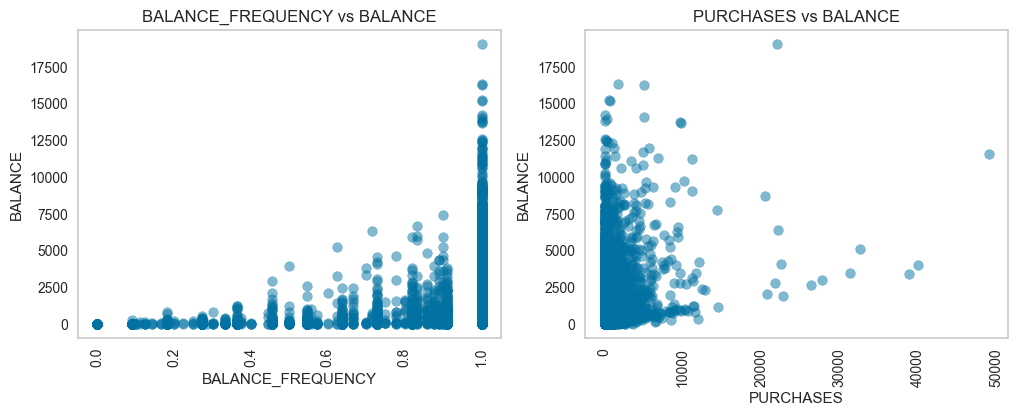

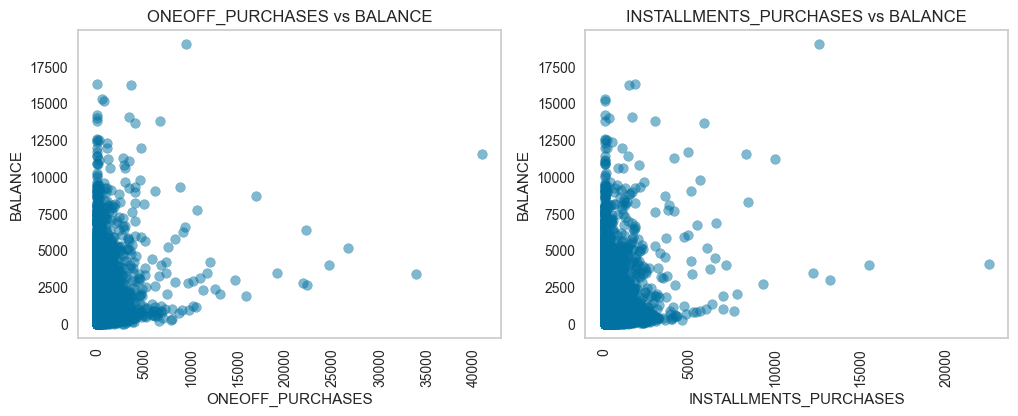

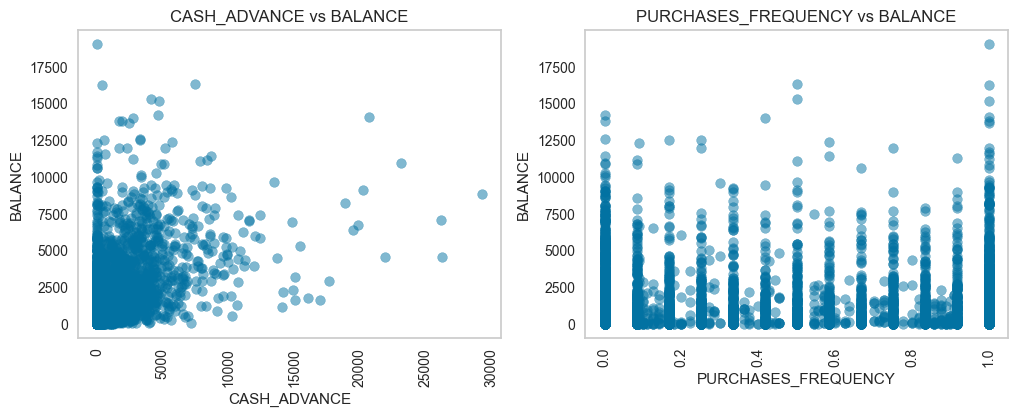

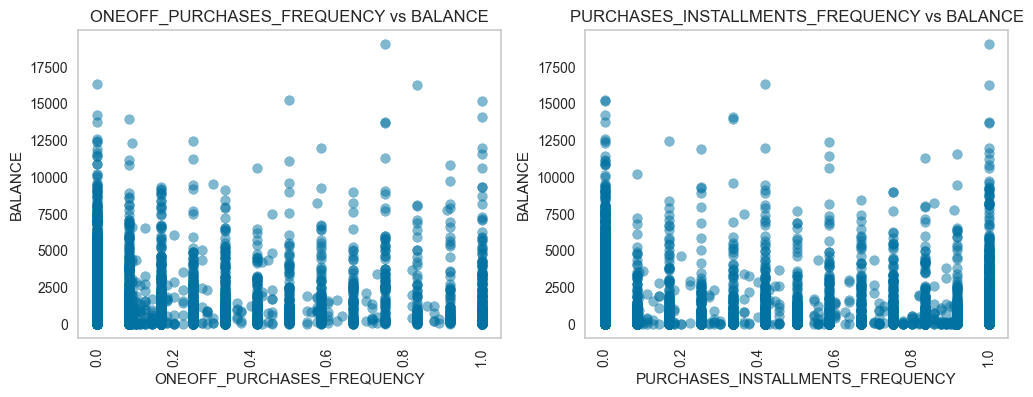

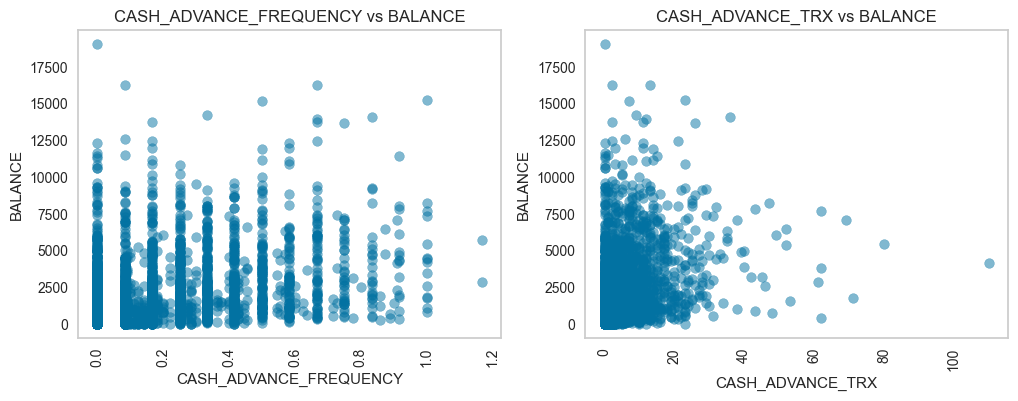

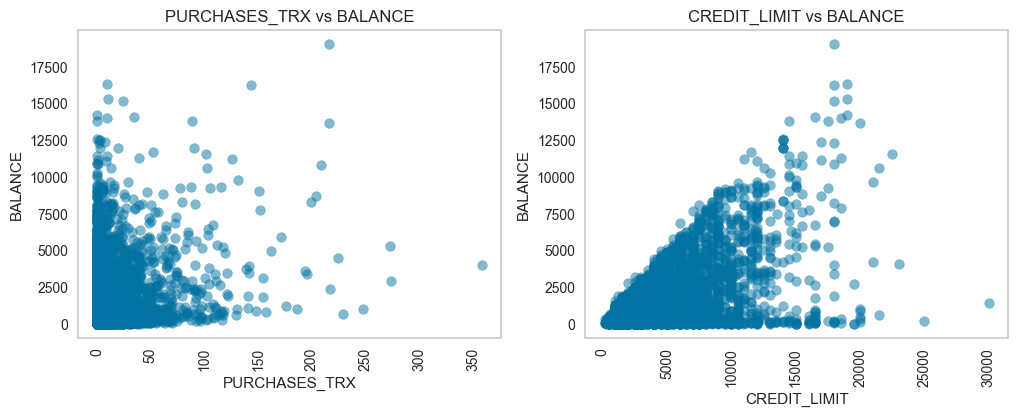

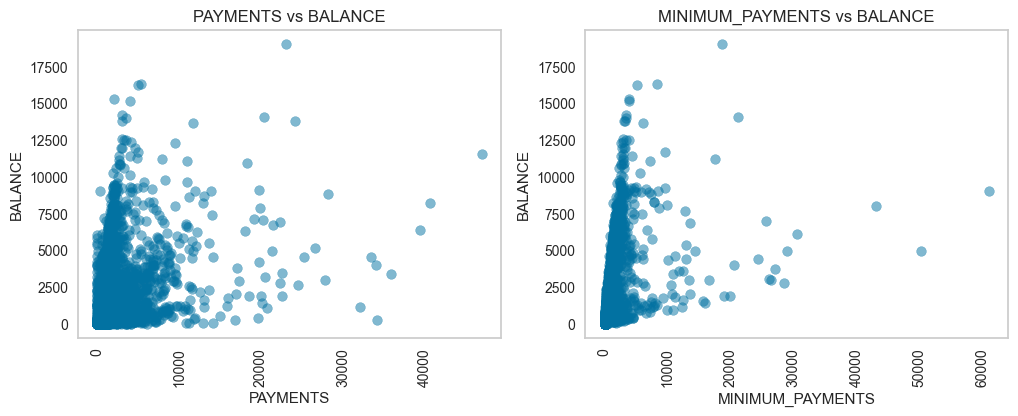

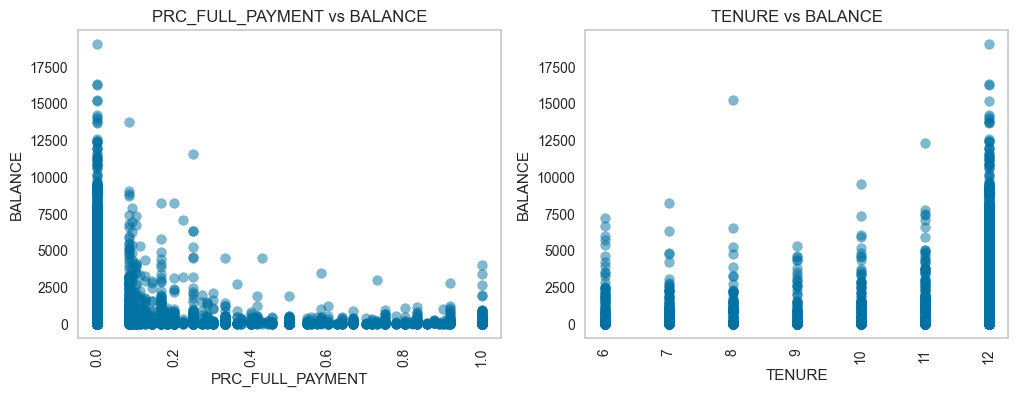

In [10]:
scatter_plot = list (df_eda.drop (["CUST_ID" , 'BALANCE'] , axis = 1))               
i =  0
while i < 16:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df_eda [scatter_plot [i]] , df_eda ["BALANCE"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs BALANCE")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("BALANCE")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df_eda [scatter_plot [i]] , df_eda ["BALANCE"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs BALANCE")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("BALANCE")
    plt.grid ()
    i += 1
    plt.show ()

Berdasarkan visualisasi diatas dengan menggunakan kolom Balance sebagai variabel (y) yang ditujukan untuk melihat jarak antar data dan pola data, didapatkan bahwa terdapat beberapa pola dalam fitur seperti data yang tersebar diseluruh rentang X tertentu, terdapat data yang tersebar pada rentang X tertentu. Kemudian terdapat juga gambaran outlier pada data jika menggunakan kolom Balance sebagai variabel (y). 

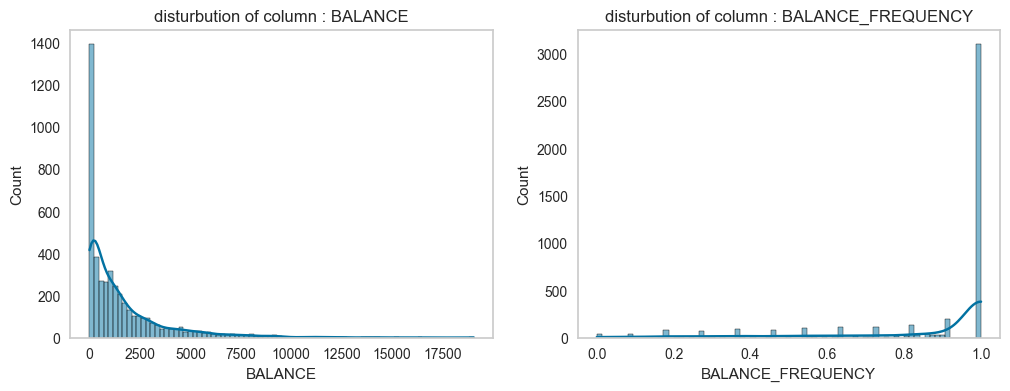

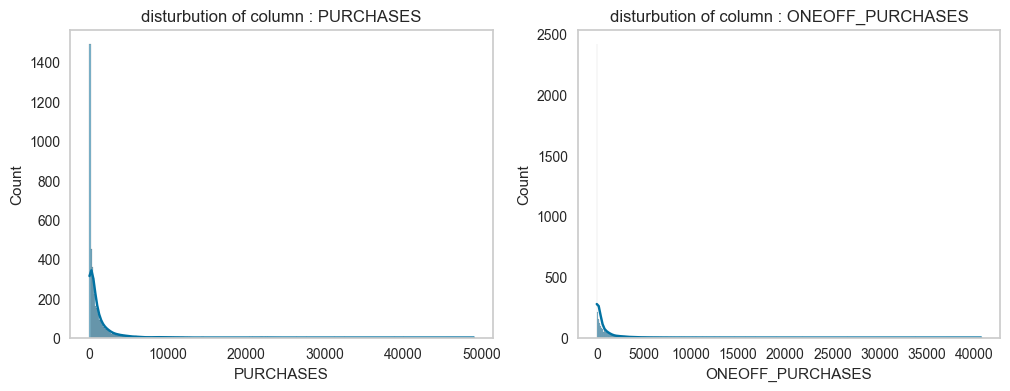

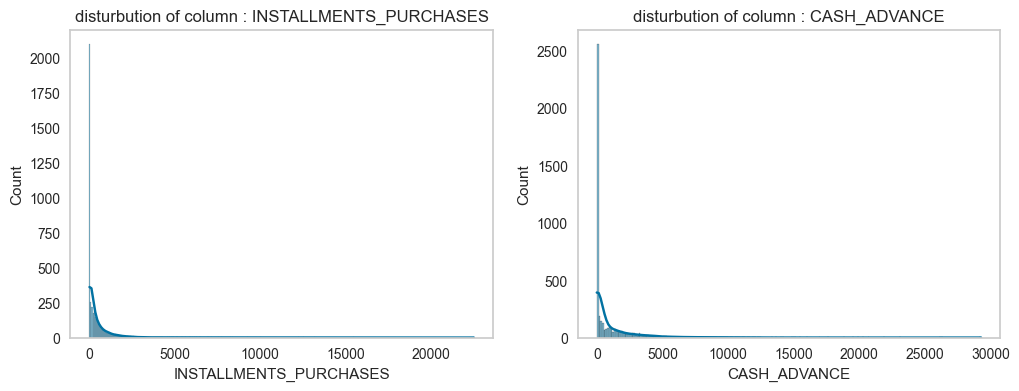

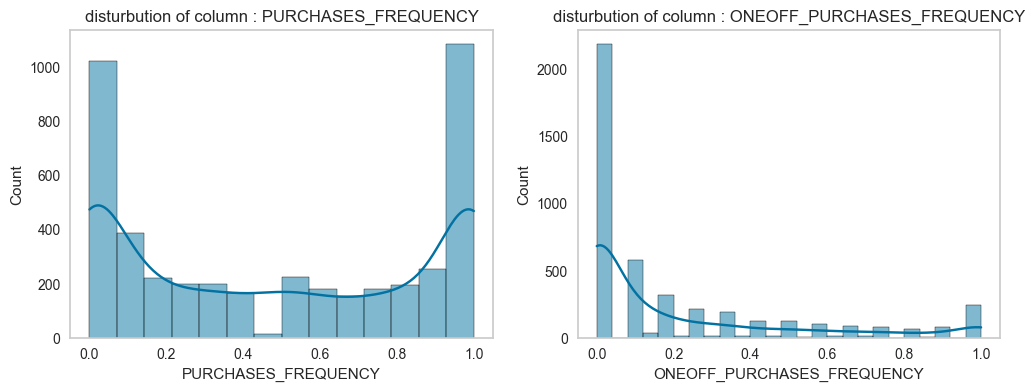

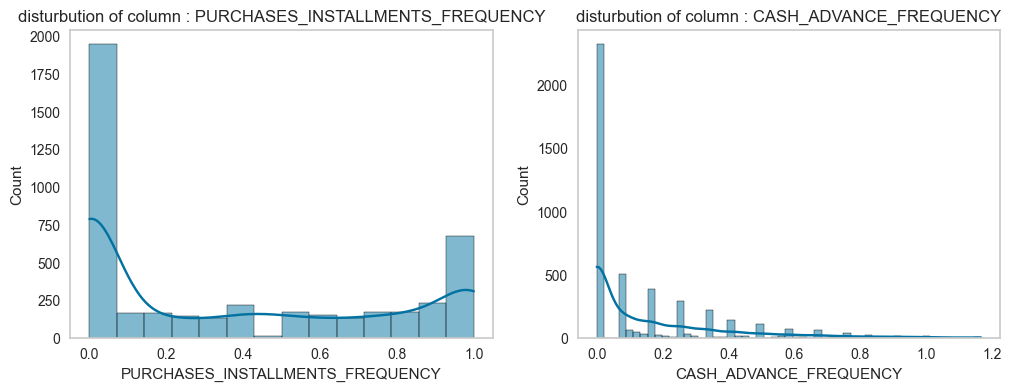

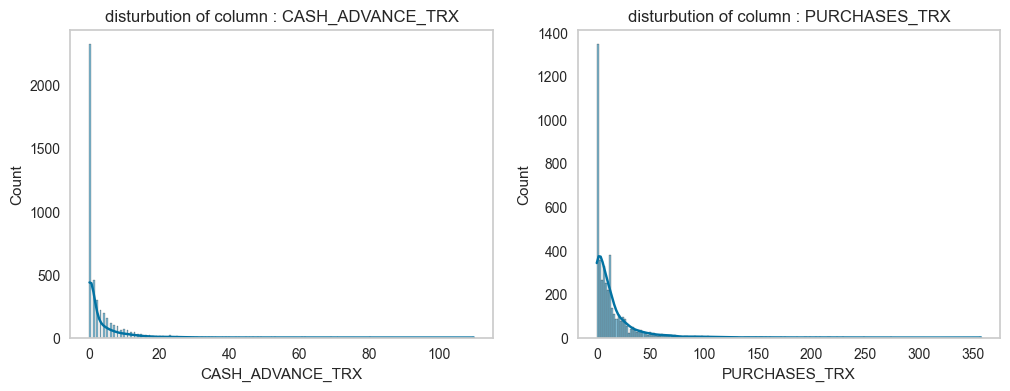

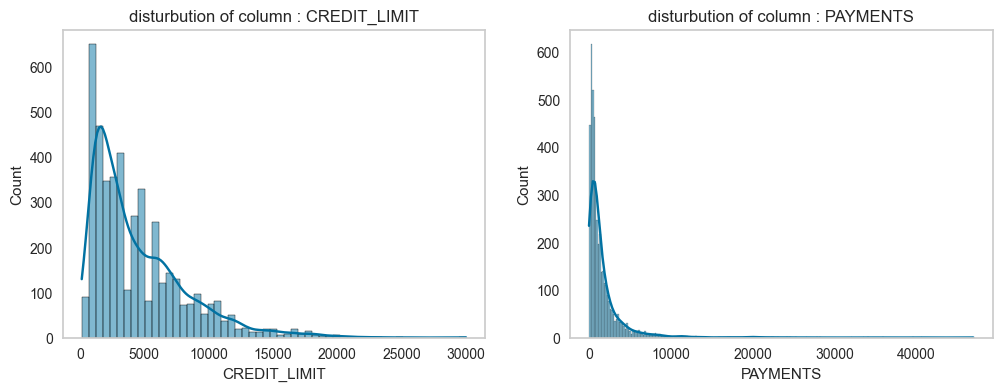

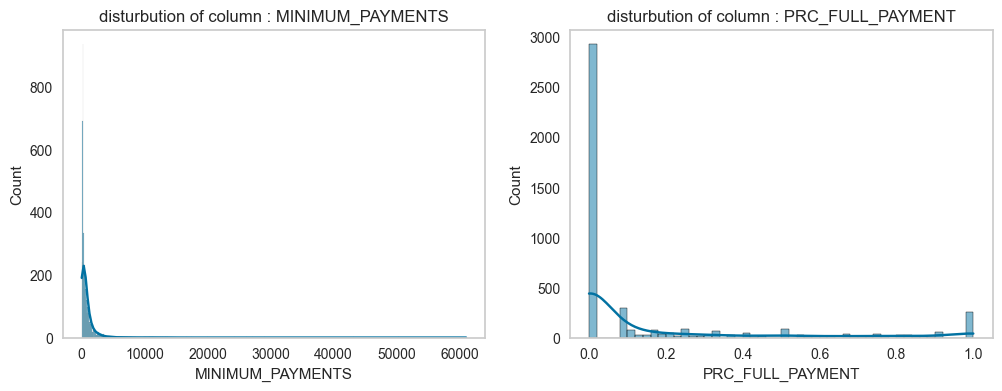

In [11]:
hist_plot = list (df_eda.drop ("CUST_ID" , axis = 1))               
i =  0
while i < 16:
    plt.figure (figsize = [12 , 4])
    plt.subplot (1 , 2 , 1)   
    sns.histplot(df_eda [hist_plot [i]] , kde=True)
    plt.title ('disturbution of column : ' + hist_plot [i])
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    sns.histplot(df_eda [hist_plot [i]] , kde=True)
    plt.title ('disturbution of column : ' + hist_plot [i])
    plt.grid ()
    i += 1
    plt.show ()

Berdasarkan informasi diatas, didapatkan bahwa distribusi pada kolom didominasi oleh distribusi skew. Kemudian terdapat informasi juga bahwa terdapat 2 puncak pesebaran data pada beberapa kolom diantaranya adalah purchase_frequency, oneoff_purchase_frequency, purchase_installments_frequency, dan prc_full_payment. Hal tersebut mendapatkan bahwa terdapat 2 nilai modus pada data.

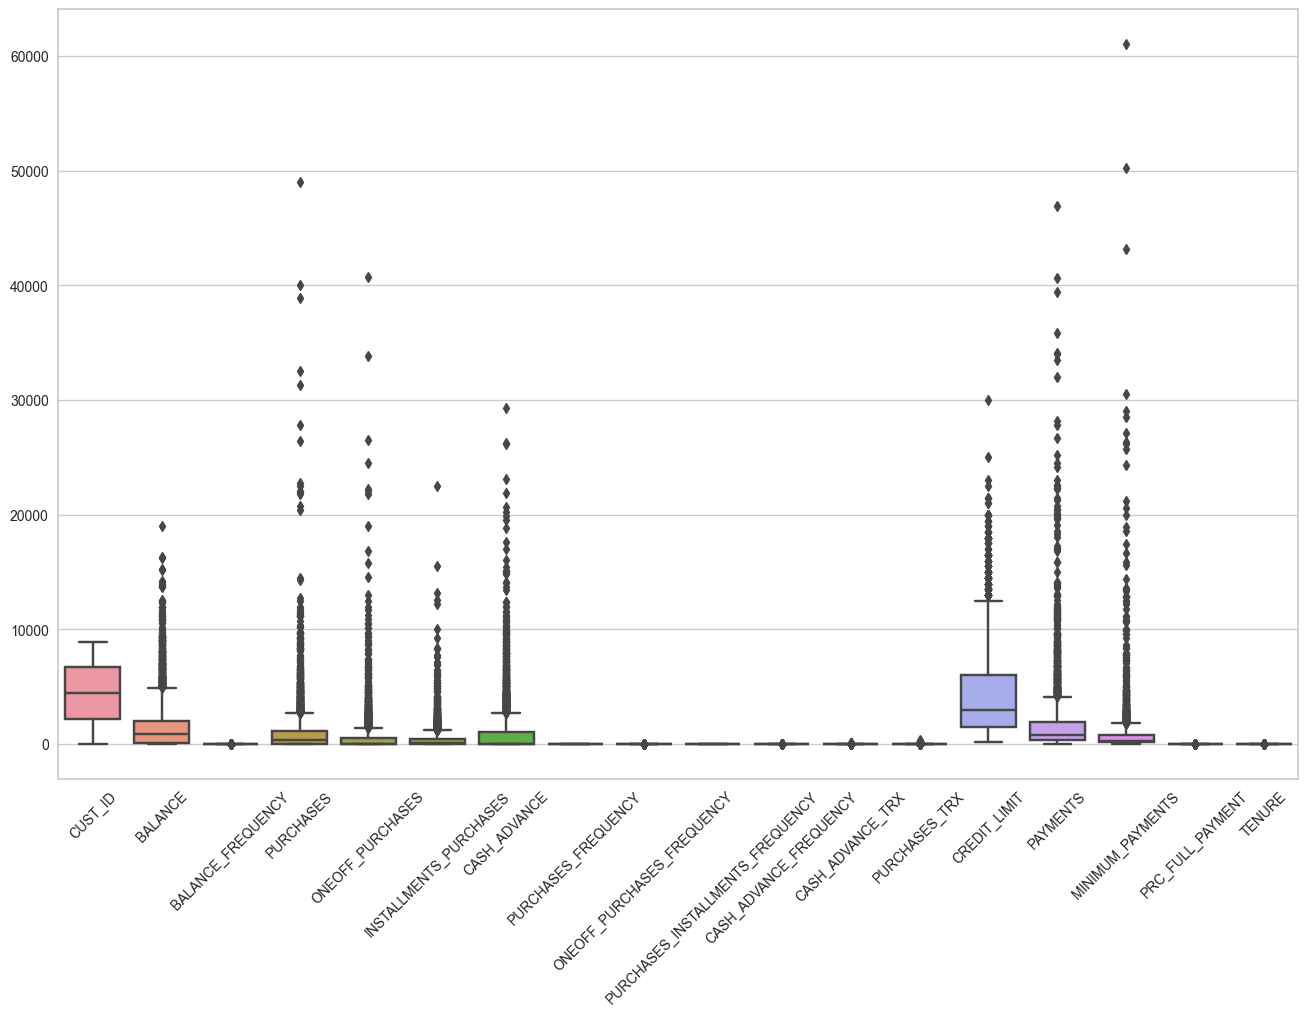

In [12]:
# Melakukan boxplot untuk seluruh kolom
plt.figure(figsize=(16, 10))  # Menyesuaikan ukuran plot

# Memilih DataFrame tanpa kolom 'CUST_ID' (jika itu adalah identifikasi unik)
sns.boxplot(data=df_eda)

# Menampilkan plot
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

Berdasarkan visualisasi diatas, didapatkan gambaran outlier pada setiap kolom seperti kolom Balance, Oneoff_purchases, dan lain-lain. Namun, perlu dilakukan check kembali pada feature engineering untuk memastikan presentase outlier pada keseluruhan data. Pada intinya adalah perlu dilakukan treatment pada outlier dalam dataset agar hasil clustering mendapatkan nilai k yang baik.

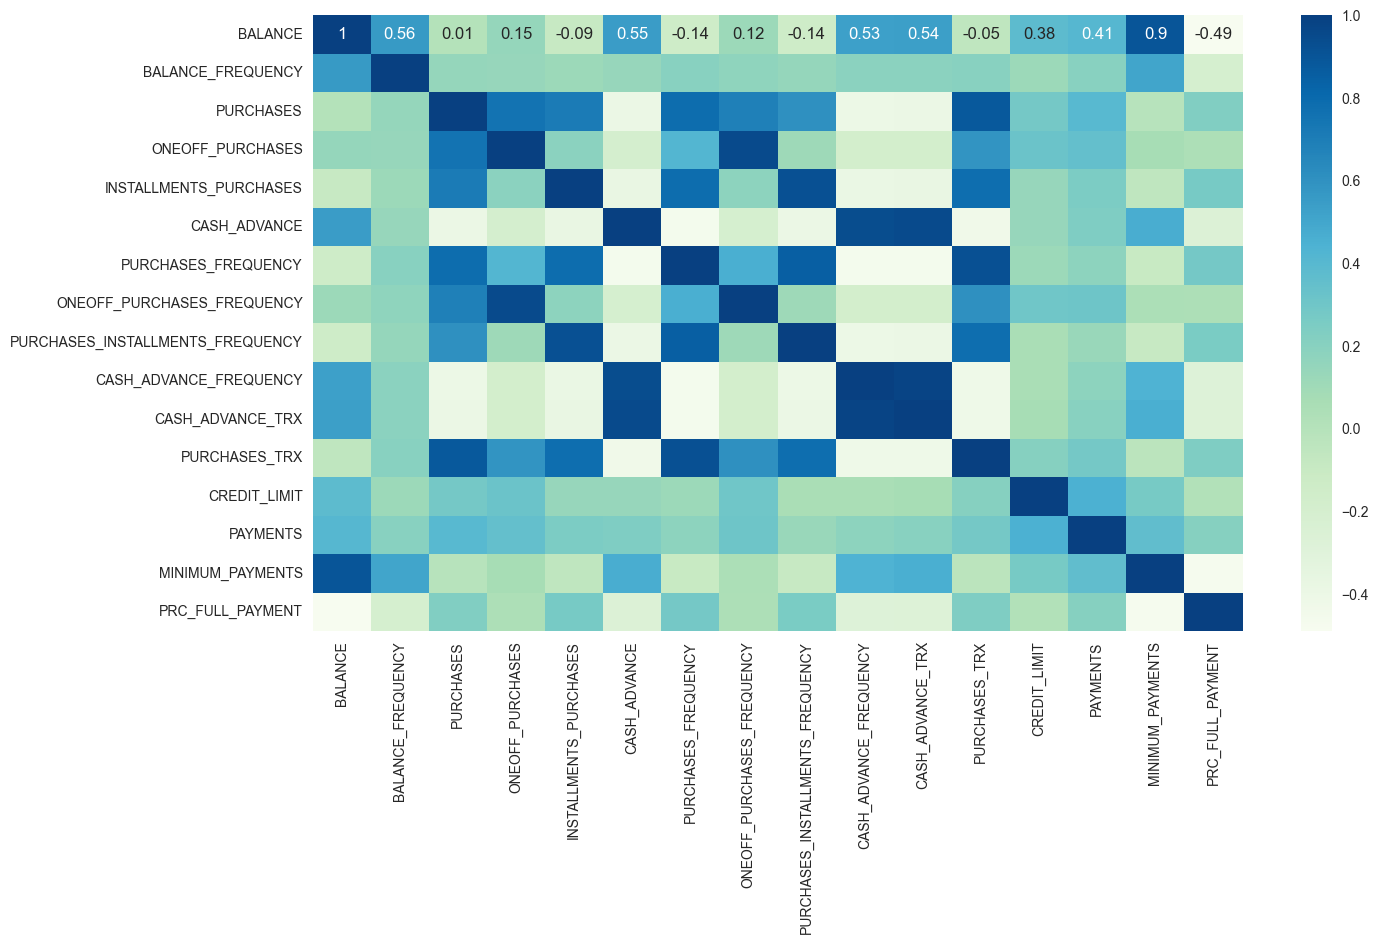

In [13]:
numerical_feat = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

plt.figure(figsize=(15, 8))
sns.heatmap(round(df_eda[numerical_feat].corr(method='spearman'), 2),
            annot=True, mask=None, cmap='GnBu')
plt.show()

Berdasarkan hasil visualisasi diatas, didapatkan bahwa jika melakukan pengelompokan kolom yang bersifat numerik terdapat beberapa kolerasi yang kuat dan lemah pada setiap kolom numerik

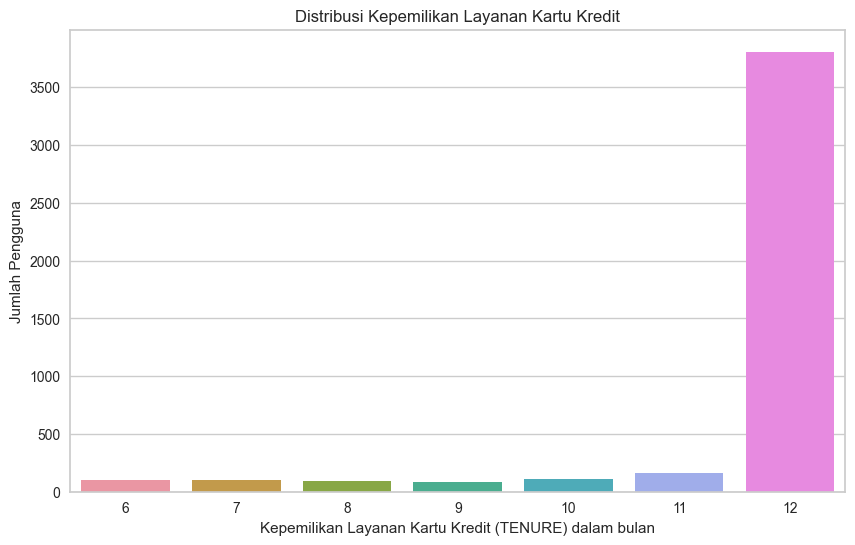

In [14]:
# Membuat countplot pada TENURE
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', data=df_eda)

# Menambahkan label pada sumbu x dan y, serta judul grafik
plt.xlabel('Kepemilikan Layanan Kartu Kredit (TENURE) dalam bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Kepemilikan Layanan Kartu Kredit')

# Menampilkan grafik
plt.show()

Berdasarkan visualisasi diatas dapat disimpulkan bahwa kepemilikan layanan kartu kredit didominasi oleh pengguna selama 12 bulan. 

# Feature Engineering

In [15]:
# Melakukan drop kolom CUST_ID dan TENURE

df = df.drop(['CUST_ID', 'TENURE'], axis=1)

Mengingat CUST_ID bukan termasuk numerik dan tidak memberikan informasi yang spesifik untuk dataset, maka kolom tersebut bisa didrop. Kemudian kolom TENURE merupakan kolom tipe kategorik dimana tidak bisa digunakan dalam reduksi.

### Handling Missing Value

In [16]:
# Membuang missing value dalam dataset
df.dropna(inplace=True)

Mengingat terdapat informasi missing value pada dataset, oleh karena itu dilakukan drop missing value pada dataset.

In [17]:
# Melakukan pengecekan missing value di setiap kolom dataset

df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Setelah dilakukan check missing value kembali, sudah tidak terdapat missing value pada dataset.

### Handling Outlier

In [18]:
# Melakukan pengecekann distribusi dengan menggunakan skewness

print('Distribusi kolom pada dataset  : ')
df.skew()

Distribusi kolom pada dataset  : 


BALANCE                              2.440901
BALANCE_FREQUENCY                   -2.083168
PURCHASES                            8.902272
ONEOFF_PURCHASES                    10.045515
INSTALLMENTS_PURCHASES               8.030305
CASH_ADVANCE                         4.713175
PURCHASES_FREQUENCY                  0.035642
ONEOFF_PURCHASES_FREQUENCY           1.494505
PURCHASES_INSTALLMENTS_FREQUENCY     0.486577
CASH_ADVANCE_FREQUENCY               1.788835
CASH_ADVANCE_TRX                     4.722877
PURCHASES_TRX                        4.429897
CREDIT_LIMIT                         1.525379
PAYMENTS                             5.987445
MINIMUM_PAYMENTS                    12.356758
PRC_FULL_PAYMENT                     1.854400
dtype: float64

Berdasarkan informasi diatas, kolom didominasi distrbusi skew dan hanya terdapat 2 kolom yang terdistribusi normal,. Hal tersebut sejalan dengan hasil EDA.

In [19]:
# Membuat fungsi untuk mencari outlier di setiap kolom
def skew_boundary(data, column):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    low = data[column].quantile(0.25) - (3 * iqr)
    up = data[column].quantile(0.75) + (3 * iqr)
    return low, up

def normal_boundary(data, column):
    low = data[column].mean() - (3 * data[column].std())
    up = data[column].mean() + (3 * data[column].std())
    return low, up

for col in df.columns.tolist():
    if abs(df[col].skew()) > 0.5:
        low, up = skew_boundary(df, col)
    else:
        low, up = normal_boundary(df, col)
    print(f"Persentase outlier {col}: {len(df[(df[col] < low) | (df[col] > up)])/len(df)*100:.2f}%")

Persentase outlier BALANCE: 2.20%
Persentase outlier BALANCE_FREQUENCY: 11.52%
Persentase outlier PURCHASES: 4.01%
Persentase outlier ONEOFF_PURCHASES: 5.95%
Persentase outlier INSTALLMENTS_PURCHASES: 4.05%
Persentase outlier CASH_ADVANCE: 5.51%
Persentase outlier PURCHASES_FREQUENCY: 0.00%
Persentase outlier ONEOFF_PURCHASES_FREQUENCY: 0.00%
Persentase outlier PURCHASES_INSTALLMENTS_FREQUENCY: 0.00%
Persentase outlier CASH_ADVANCE_FREQUENCY: 0.05%
Persentase outlier CASH_ADVANCE_TRX: 4.12%
Persentase outlier PURCHASES_TRX: 3.87%
Persentase outlier CREDIT_LIMIT: 0.09%
Persentase outlier PAYMENTS: 4.40%
Persentase outlier MINIMUM_PAYMENTS: 4.63%
Persentase outlier PRC_FULL_PAYMENT: 10.68%


Membuat fungsi skew_boundary dan normal_boundary untuk melalukan pengecekan outlier pada setiap kolom

### Capping

In [20]:
# First, capping the skew distribution


winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                                        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                        'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

df_capped = winsoriser.fit_transform(df)

Mengingat terdapat informasi outlier pada pada dataset, dalam hal ini menggunakan capping dengan metode iqr. Adapun kolom yang dilakukan capping seperti 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' karena terdapat persentase outlier dalam dataset. Dilakukan capping mengingat K-Means cukup sensitif terhadap outlier. Sedangkan PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY dan CREDIT_LIMIT tidak dilakukan capping karena tidak terdapat outlier pada dataset.

### Feature Scaling

In [21]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped)

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

PCA()

Melakukan scaling menggunakan StandarScaler karena outlier sudah dilakukan capping dalam dataset.

Text(0, 0.5, 'Eigenvalues')

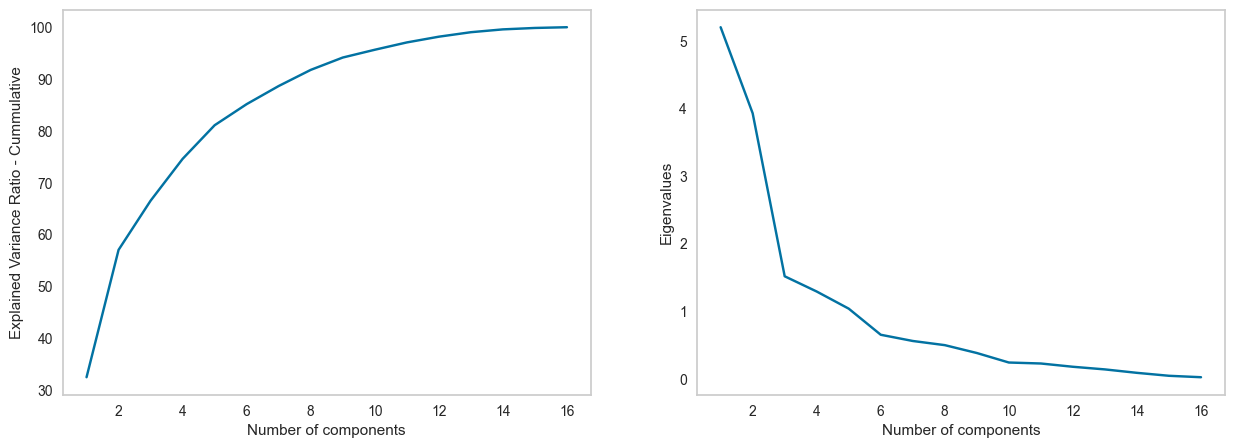

In [22]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Menampilkan grafik Explained Variance Ratio - Cummulative dan Eigenvalues. Pada grafik Explained Variance Ratio digunakan untuk memahami seberapa banyak varians yang dijelaskan oleh setiap tambahan komponen serta membantu dalam menentukan jumlah komponen yang ingin dipertahankan. Kemudian pada grafik Eigenvalues digunakan untuk memberikan gambaran tentang kontribusi masing-masing komponen terhadap total varians dalam data

In [23]:
# Memeriksa jumlah fitur dengan mempertahakan 95% informasi

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

Berdasarkan hasil diatas, didapatkan bahwa fitur yang akan digunakan adalah 10 untuk mempertahakan 95 informasi dalam dataset.

# Model Definition

Dalam project ini saya menggunakan K-Means dalam membentuk model. Adapun alasan menggunakan K-Means dalam menentukan clustering adalah:

1. Tidak terdapat label atau target di dalam dataset sehingga K-Means cukup baik dalam membentuk cluster pada dataset.

2. Di dalam dataset didominasi oleh kolom yang bersifat numerik sehingga K-Means cukup cocok digunakan dalam pemodelan.

Adapun hyperparameter yang digunakan dalam model K-Means Clustering adalah n_cluster. Alasannya adalah n_cluster merupakan paramter utama dalam K-Means, yang dapat didapatkan nilainya dari beberapa metode seperti Elbow Method dan Silhoutte Plot dan Score.

Kemudian beberapa metric yang digunakan untuk membantu menentukan n_cluster yang tepat adalah menggunakan inertia (atau Within-Cluster Sum of Squares) dan Silhoutte Score. Inertia atau WCSS digunakan untuk mengukur jauh titik-titik data dalam suatu kluster dari pusat klusternya. Tujuan utama adalah meminimalkan inertia. Kemudian silhoutte score digunakan untuk mengukur seberapa baik objek berada di dalam kluster dibandingkan dengan kluster tetangganya.

Adapun beberapa method yang sudah disebutkan sebelumnya untuk mencari nilai kluster, seperti:

1. Elbow Method

Metode ini menggunakan inertia (WCSS) untuk menentukan jumlah kluster yang optimal. Nilai inertia dicatat untuk berbagai nilai k kluster, dan titik "elbow" atau siku pada grafik inertia vs. jumlah kluster menjadi pilihan yang baik. Jika terdapat siku pada grafik dapat menunjukkan nilai k yang optimal. Namun analisis Elbow Method juga perlu disokong oleh analisis lain seperti Silhoutte plot dan score.

2. Silhouette Plot 

Metode ini melibatkan perhitungan Silhouette Score untuk berbagai jumlah kluster. Jumlah kluster dengan nilai Silhouette Score tertinggi menjadi pilihan yang baik. Kemudian silhoutte juga mempertimbangkan plot distribusi data dari kluster yang sudah dibuat. Jika distribusi data sudah seimbang diantara kluster yang dibuat, maka kluster tersebut dapat dikatakan kluster yang optimal. 


# Model Training

In [24]:
# Melatih model dengan menggunakan PCA 95%

pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

Melatih model dengan menggunakan PCA 95% yang artinya ingin mempertahankan setidaknya 95% varians dari data asli

### Elbow Method

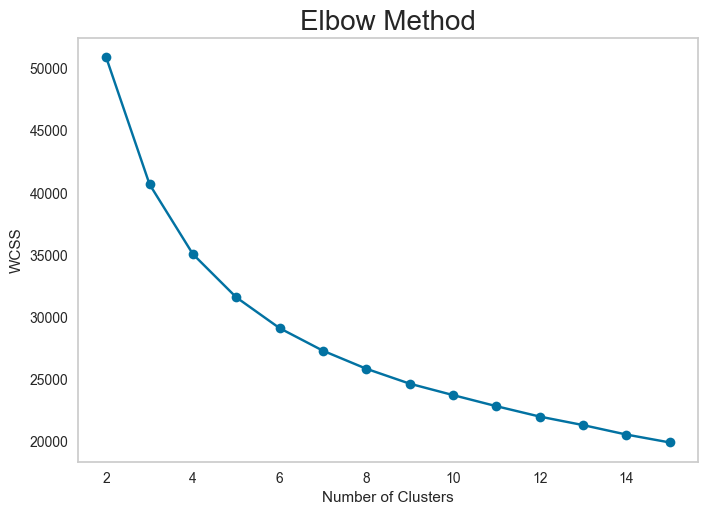

In [25]:
# Mencari nilai K optimal mengggunakan Elbow Method


wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan hasil ELbow Method, didapatkan hasil setidaknya siku terlihat pada Kluster 3 dan 4. Untuk meyakinkan kembali pilihan dilakukan method untuk mencari plot dan score Silhoutte Menggunakan Scikit-Learn dan Yellowbrick

### Silhoutee Plot & Silhoutte Score Menggunakan Scikit-Learn

In [26]:
# Fungsi untuk membuat silhoute score

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Membuat fungsi untuk membuat grafik plot silahoutte dan visualisasi kluster data, serta menampilkan score silhoutte score di masing-masing jumlah kluster

For n_clusters = 2 The average silhouette_score is : 0.28978321893510806
For n_clusters = 3 The average silhouette_score is : 0.265468666229843
For n_clusters = 4 The average silhouette_score is : 0.22222453741164874
For n_clusters = 5 The average silhouette_score is : 0.22680746125232262
For n_clusters = 6 The average silhouette_score is : 0.23279329156364992
For n_clusters = 7 The average silhouette_score is : 0.22444686393949675
For n_clusters = 8 The average silhouette_score is : 0.22118061554765145
For n_clusters = 9 The average silhouette_score is : 0.2222233618570095
For n_clusters = 10 The average silhouette_score is : 0.21759960674094436
For n_clusters = 11 The average silhouette_score is : 0.21332466665288144
For n_clusters = 12 The average silhouette_score is : 0.21864523950264506
For n_clusters = 13 The average silhouette_score is : 0.22239603665793942
For n_clusters = 14 The average silhouette_score is : 0.22288725641935223


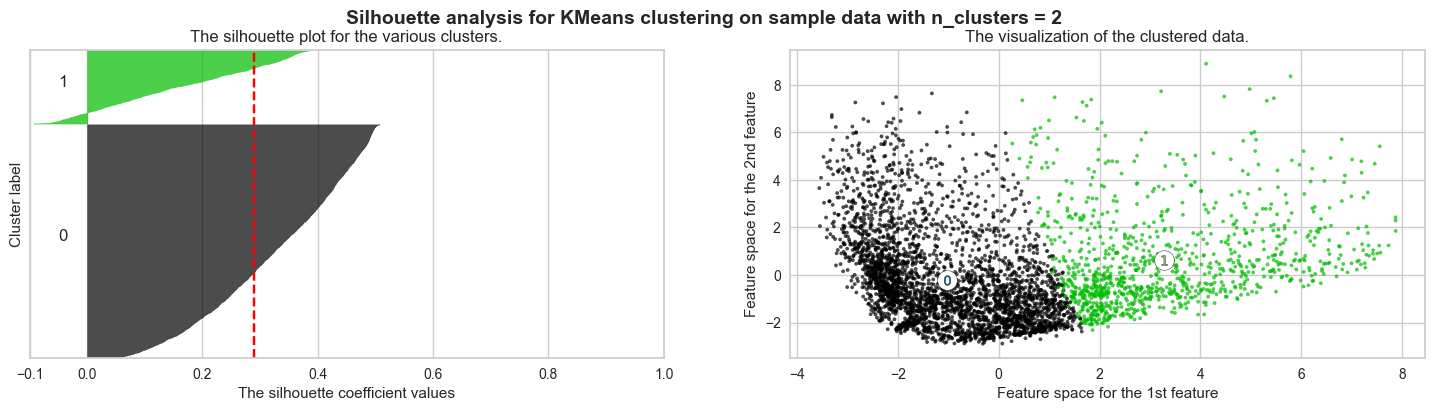

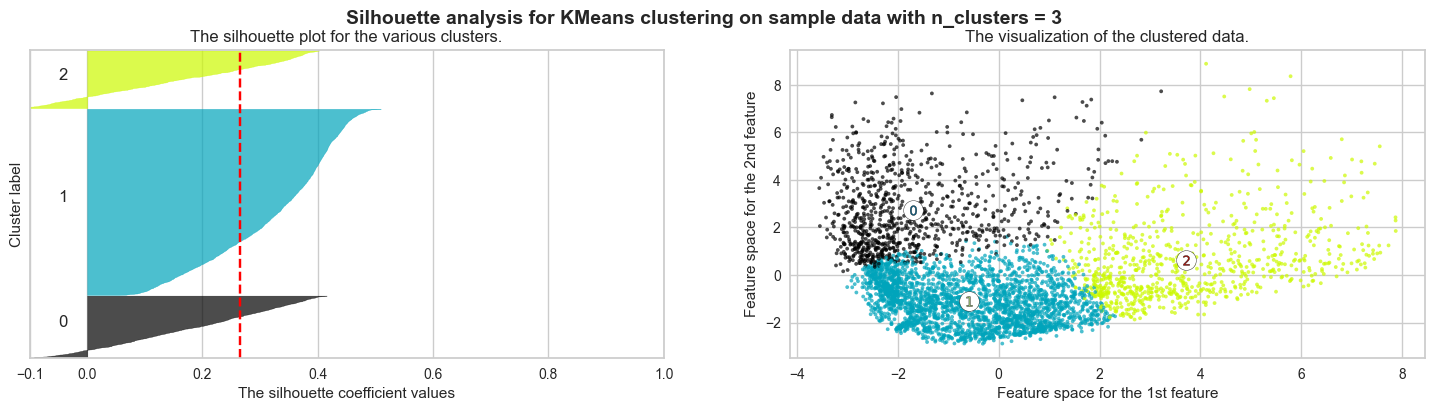

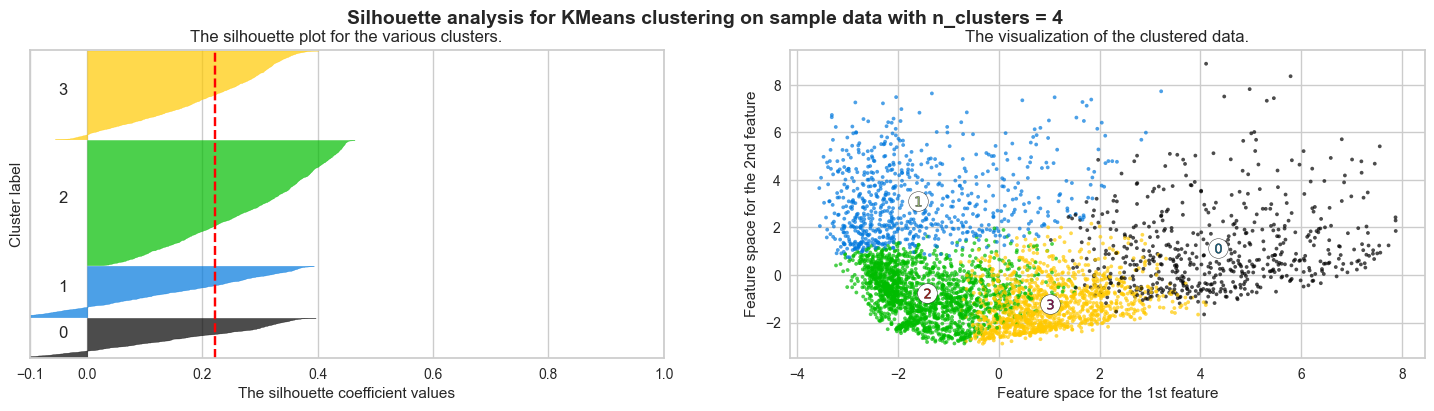

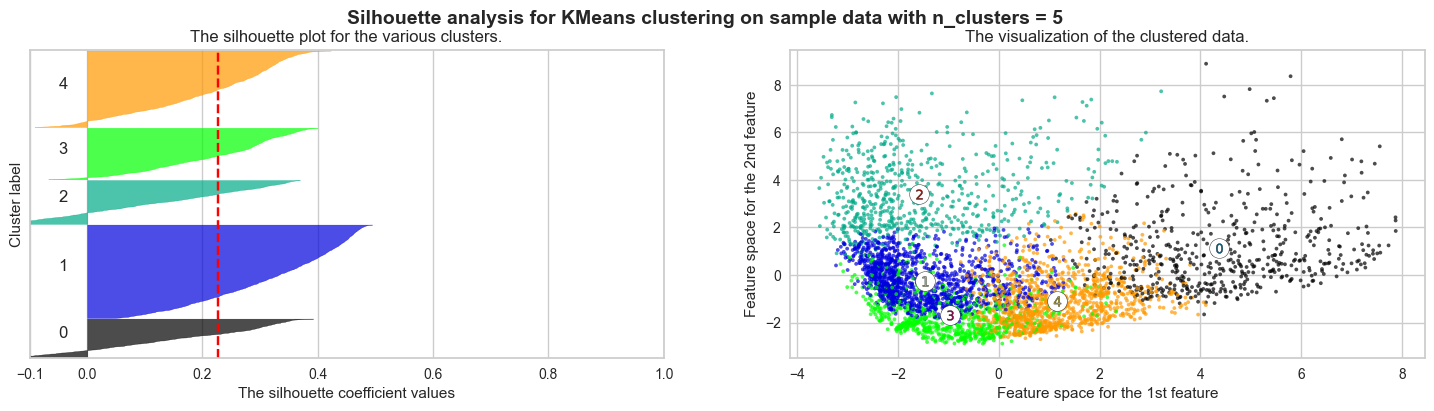

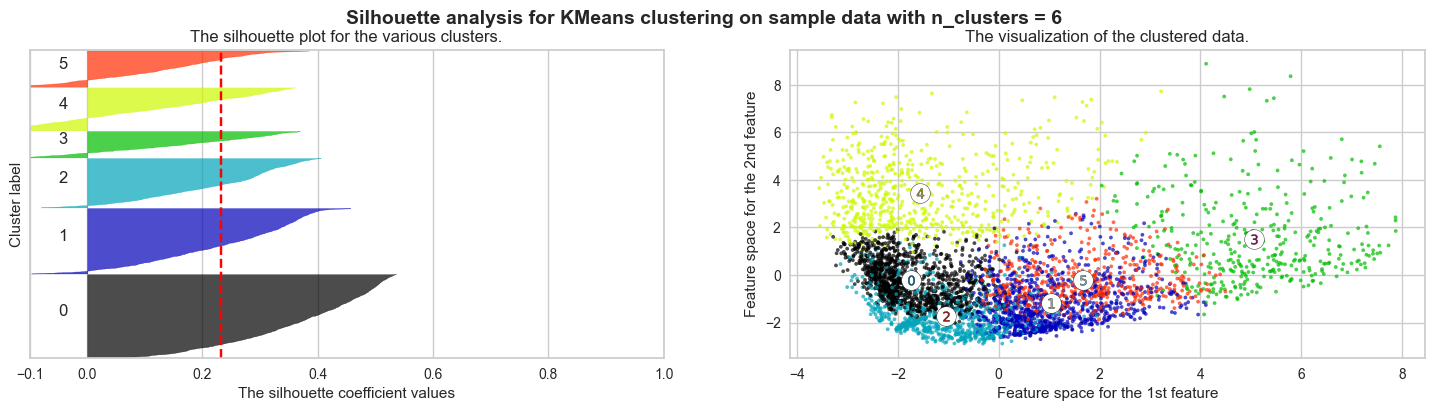

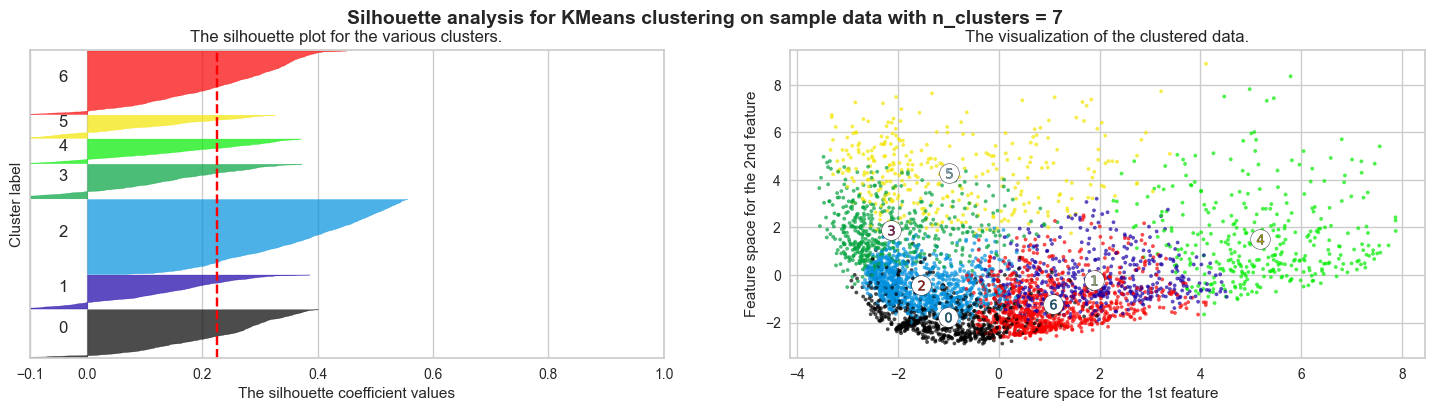

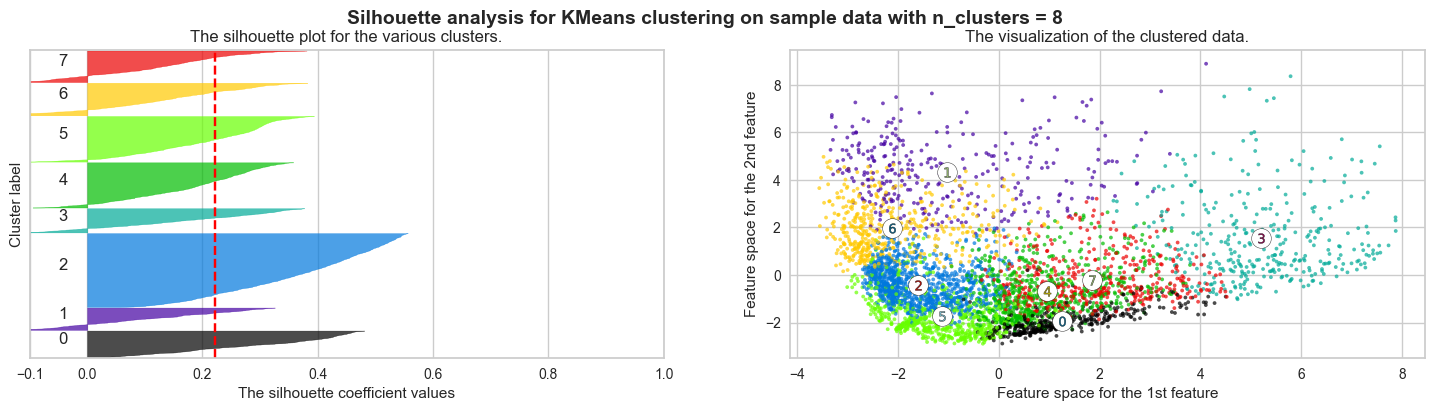

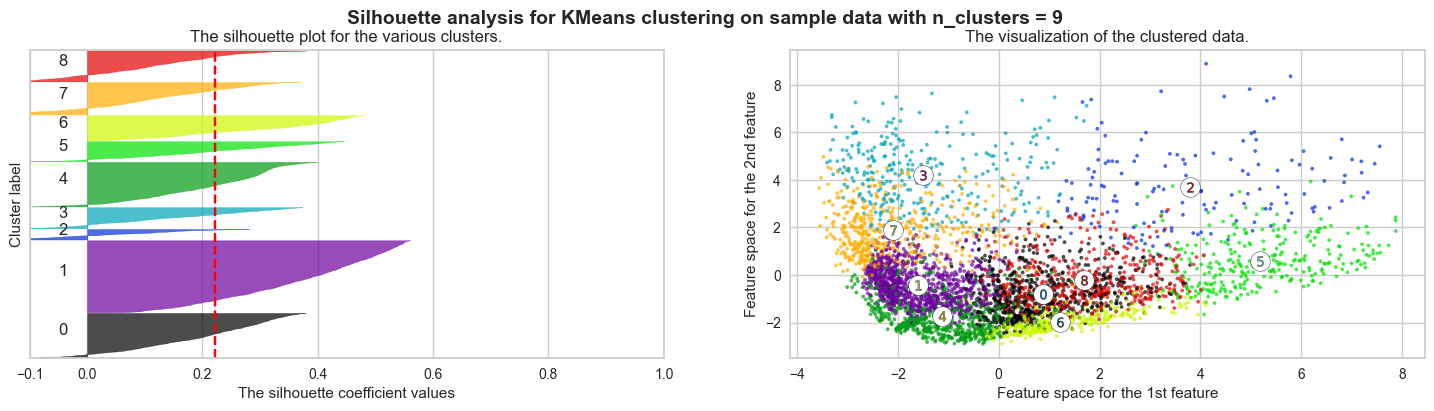

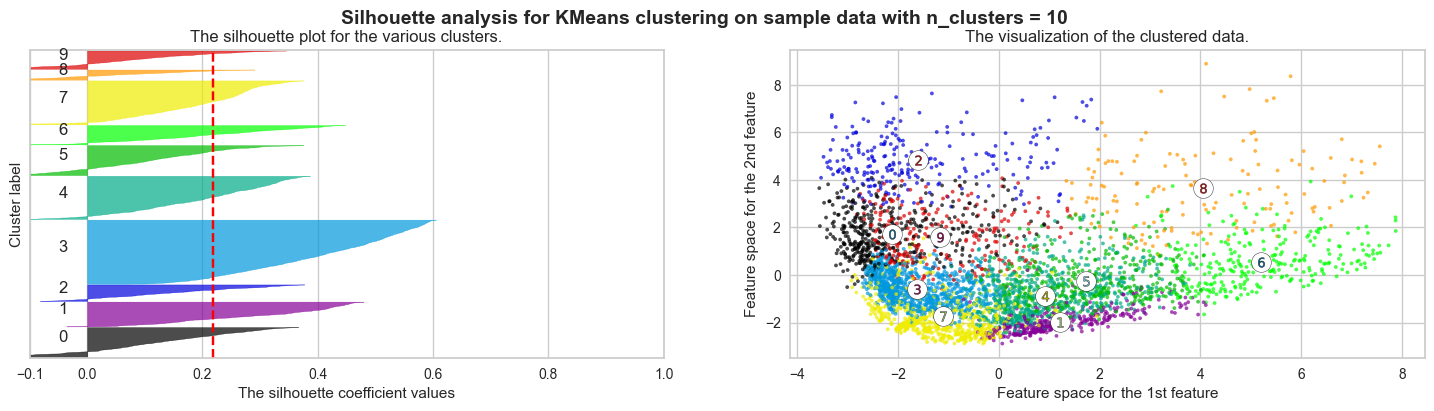

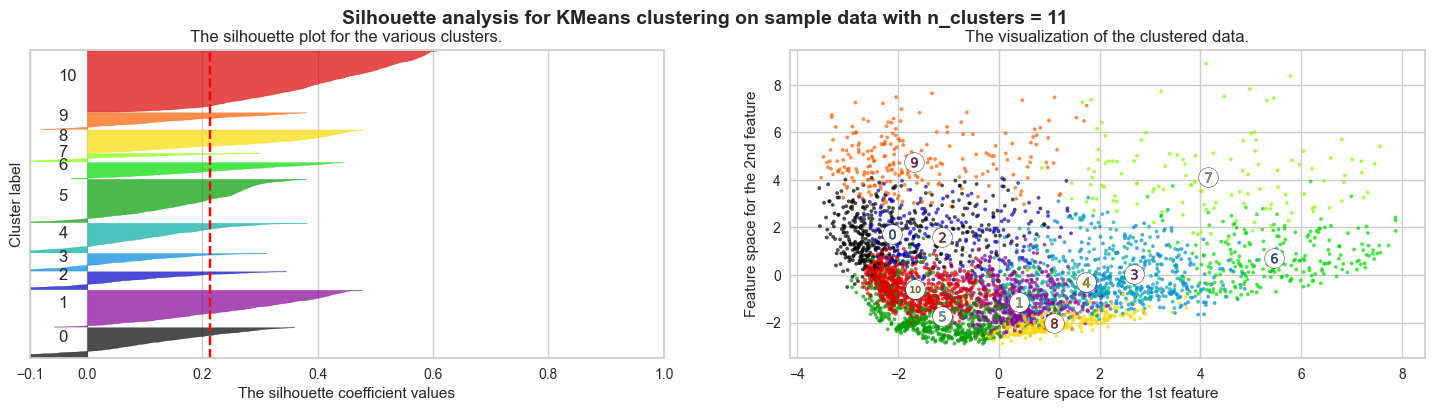

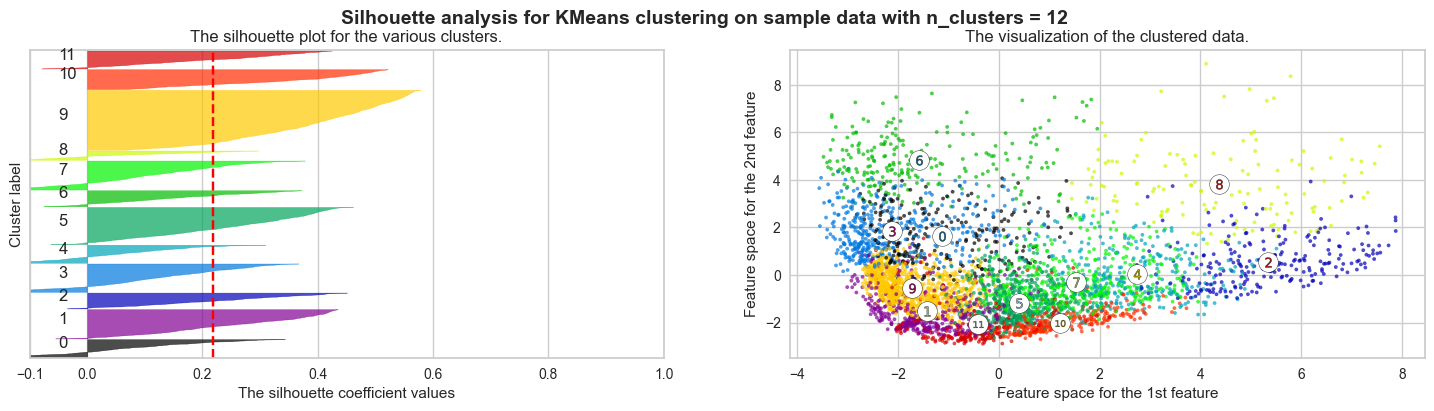

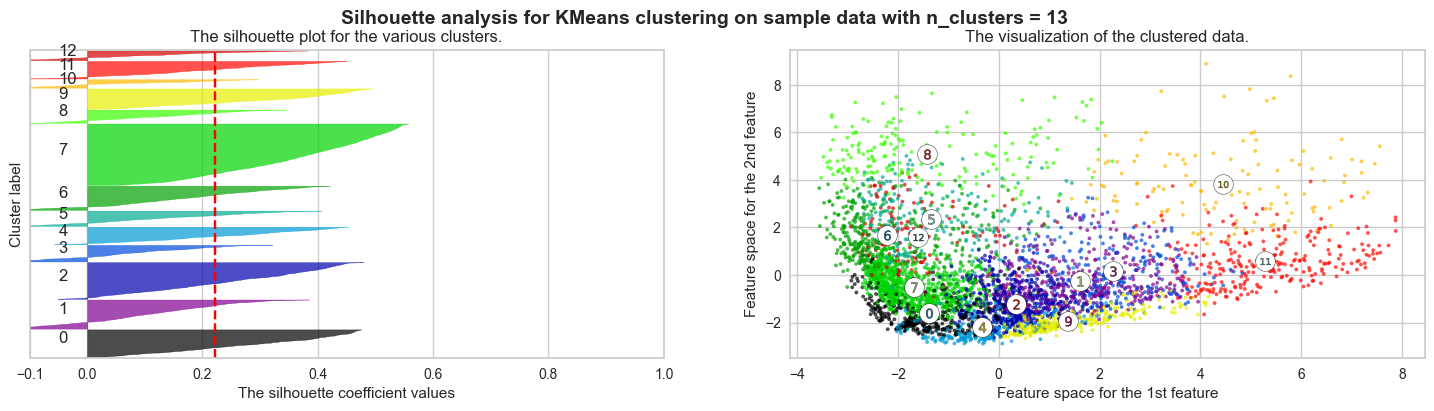

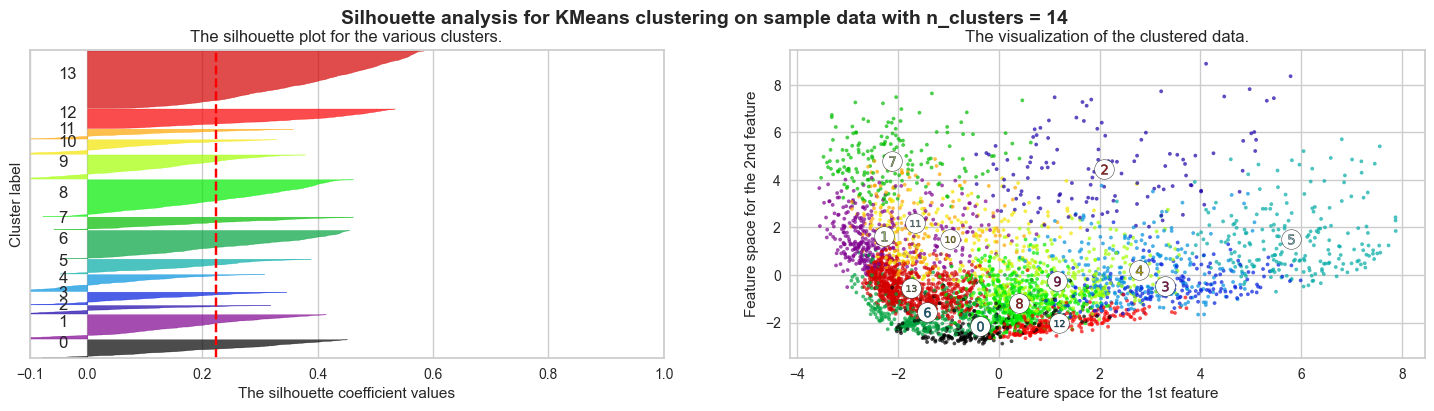

In [27]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

Berdasarkan Silhoutee Plot & Silhoutte Score Menggunakan Scikit-Learn didapatkan bahwa silhoute score lebih tinggi jika menggunakan n-cluster = 2, namun berdasarkan hasil plot distribusi data di tiap cluster tampak tidak seimbang. Jika dibandingkan dengan n_cluster = 3, hasil silhoutte score cukup baik walaupun masih rendah jika dibandingkan dengan n-cluster = 2,  namun berdasarkan hasil plot distribusi data di tiap cluster cukup seimbang.

### Silhoutee Plot & Silhoutte Score Menggunakan Yellow Brick

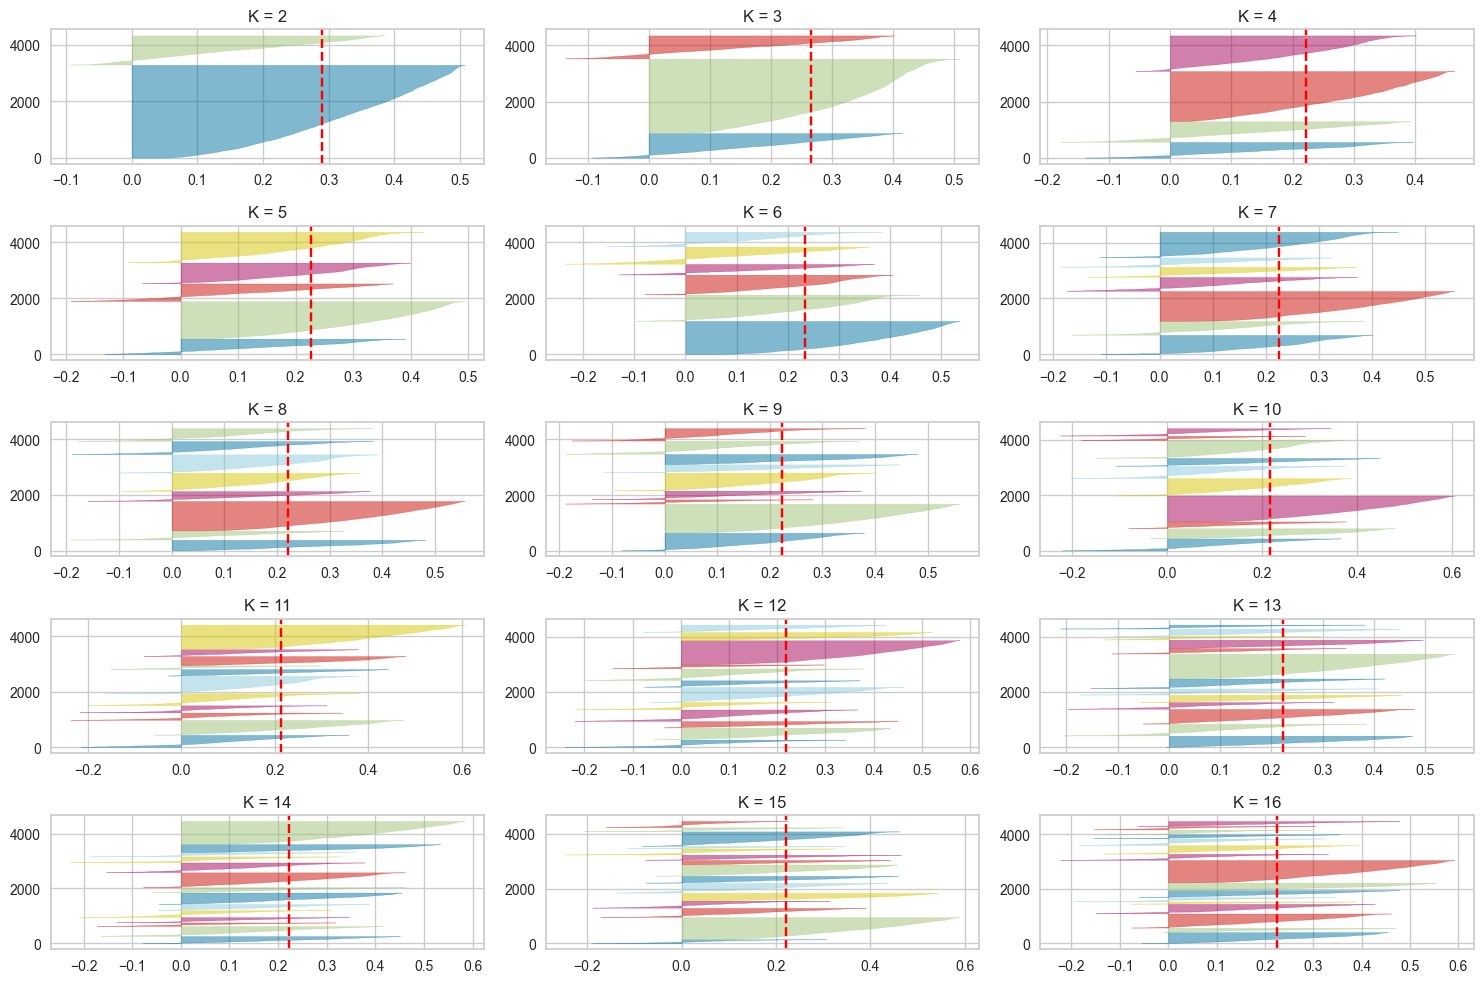

In [28]:
# Display the Silhouette Score and Plot Silhouette Plot


fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Berdasarkan Silhoutee Plot & Silhoutte Score Menggunakan Yellow Brick didapatkan bahwa kluster = 3 memiliki skor siluet lebih dari skor rata-rata kumpulan data (garis merah pada gambar).

# Model Evaluation

### Train with Optimal Number Of Cluster

In [29]:
# Mengevaluasi dengan jumlah cluster optimal = 3

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

array([1, 1, 1, ..., 0, 0, 0])

Melakukan elavaluasi dengan menggunakan cluster = 3

In [30]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.375000    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
1      215.325023        410.484825          0.000000        1  
3      258.032630        151.696433          0.000000        1  
4      397.090516        227.143184          0.000000        1  
5      343.102984        712.986387          0.000000        1  
7       57.266292         56.720210          0.000000        1  
...           ...               ...               ...      ...  
4470  1379.635287        271.364415          0.090909        0  
4471  4372.148648        241.645387          0.090909        0  
4

Memasukkan cluster pada dataset 

## EDA clustering

### Visualisasi cluster 2D

<Axes: >

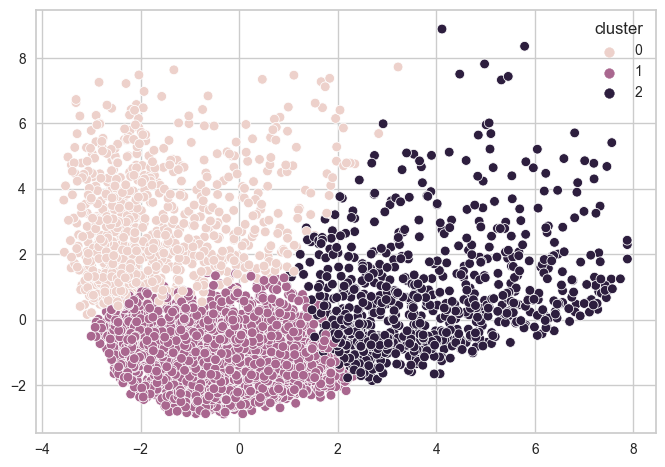

In [31]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=3)
pca_2d.fit(df_scaled_pca)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df['cluster'])

Berdasarkan visualisasi diatas didapatkan gambaran bagaimana data tersebar dan terkumpul pada kluster yang sudah ditentukan, dalam hal ini jumlah kluster = 3.

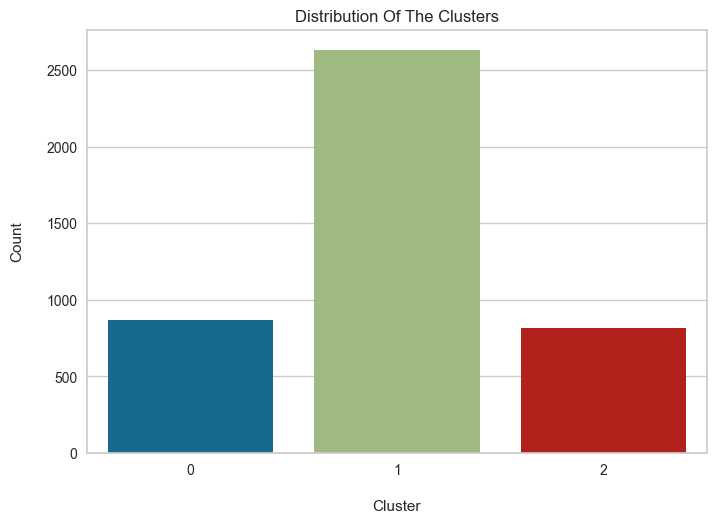

In [32]:
#histogram untuk melihat jumlah tiap cluster

pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.xlabel('Cluster',labelpad=16)
plt.ylabel('Count' ,labelpad=16)
plt.show()

Berdasarkan informasi diatas didapatkan bahwa kluster 1 mendominasi pada dataset, dan diikuti oleh kluster 0 serta kluster 2.

### Melihat perilaku kluster berdasarkan BALANCE, PURCHASES, CREDIT_LIMIT, dan PAYMENTS

<Axes: ylabel='cluster'>

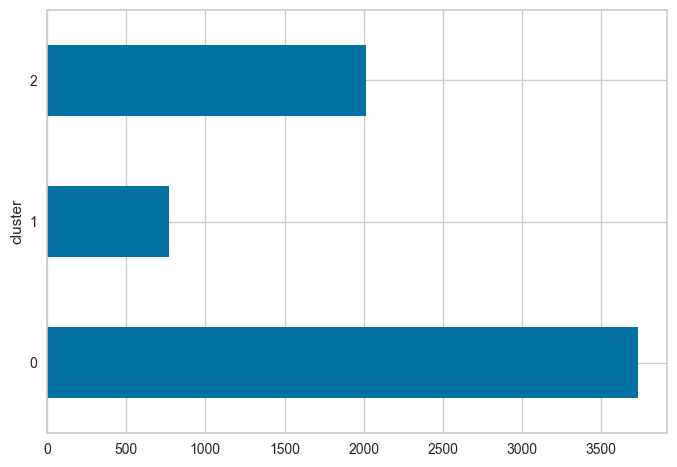

In [33]:
# Menampilkan rata-rata balance berdasarkan cluster groupby

df.groupby('cluster')['BALANCE'].mean().plot(kind = 'barh')

Berdasarkan visualisasi yang disajikan, tampak bahwa kluster 0 mendominasi dalam hal rata-rata saldo atau jumlah dana yang tersisa di akun mereka untuk melakukan pembelian. Kluster 0 menunjukkan rata-rata saldo yang lebih tinggi dibandingkan dengan kluster 2 dan kluster 1. Selanjutnya, kluster 2 menempati peringkat kedua dalam hal rata-rata saldo, diikuti oleh kluster 1. Informasi ini mengindikasikan bahwa kelompok akun yang tergabung dalam kluster 0 cenderung memiliki saldo yang lebih besar dibandingkan dengan kluster lainnya, memberikan pemahaman tentang kapasitas pembelian yang lebih tinggi dalam kluster tersebut.

<Axes: ylabel='cluster'>

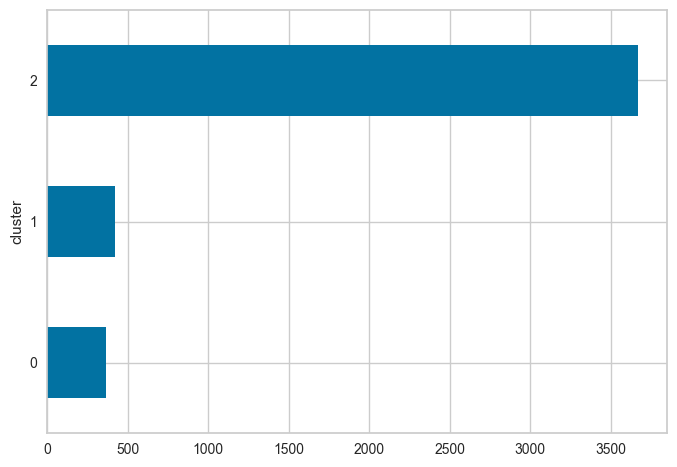

In [34]:
# Menampilkan rata-rata PURCHASES berdasarkan cluster groupby

df.groupby('cluster')['PURCHASES'].mean().plot(kind = 'barh')

Berdasarkan visualisasi yang disajikan, terlihat bahwa kluster 2 memiliki rata-rata jumlah pembelian yang lebih tinggi dibandingkan dengan kluster 1 dan kluster 0. Oleh karena itu, dominasi dalam jumlah pembelian didapati pada kluster 2. Kluster 1 menduduki peringkat kedua dalam hal rata-rata pembelian, diikuti oleh kluster 0. Informasi ini memberikan gambaran bahwa kelompok akun yang termasuk dalam kluster 2 memiliki kecenderungan untuk melakukan pembelian dalam jumlah yang lebih besar dibandingkan dengan kluster lainnya, memberikan insight tentang perilaku konsumsi yang mungkin berbeda antar-kluster.

<Axes: ylabel='cluster'>

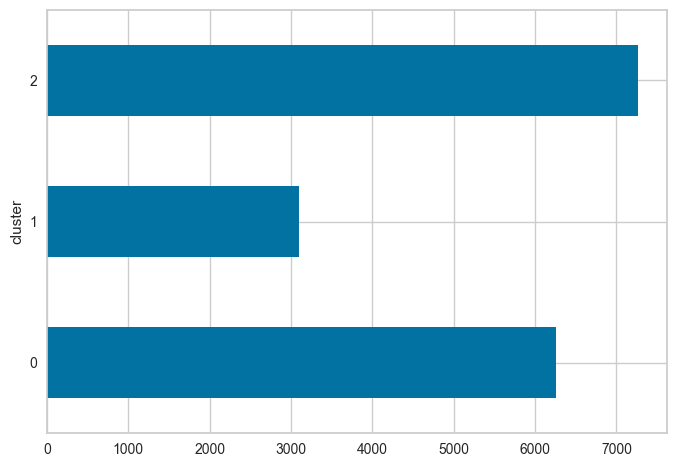

In [35]:
# Menampilkan rata-rata CREDIT_LIMIT berdasarkan cluster groupby

df.groupby('cluster')['CREDIT_LIMIT'].mean().plot(kind = 'barh')

Dari visualisasi yang terlihat, dapat disimpulkan bahwa kluster 2 mendominasi dalam hal rata-rata credit limit atau batas kartu kredit untuk pengguna. Kluster 2 menunjukkan rata-rata credit limit yang lebih tinggi dibandingkan dengan kluster 0 dan kluster 1. Selanjutnya, kluster 0 menempati peringkat kedua dalam hal rata-rata credit limit, diikuti oleh kluster 1. Informasi ini menunjukkan bahwa kelompok akun yang termasuk dalam kluster 2 cenderung memiliki batas kartu kredit yang lebih tinggi dibandingkan dengan kluster lainnya, memberikan pemahaman tentang limitasi kredit yang lebih besar dalam kluster tersebut.

<Axes: ylabel='cluster'>

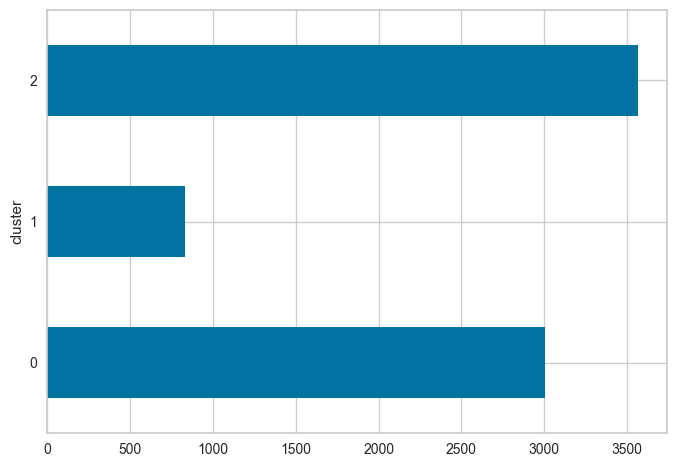

In [36]:
# Menampilkan rata-rata PAYMENTS berdasarkan cluster groupby

df.groupby('cluster')['PAYMENTS'].mean().plot(kind = 'barh')

Dari visualisasi yang disajikan, dapat disimpulkan bahwa kluster 2 mendominasi dalam hal rata-rata pembayaran atau jumlah pembayaran yang dilakukan oleh pengguna. Kluster 2 menunjukkan rata-rata pembayaran yang lebih tinggi dibandingkan dengan kluster 0 dan kluster 1. Selanjutnya, kluster 0 menempati peringkat kedua dalam hal rata-rata pembayaran, diikuti oleh kluster 1. Informasi ini mengindikasikan bahwa kelompok akun yang termasuk dalam kluster 2 cenderung melakukan pembayaran dengan jumlah yang lebih besar dibandingkan dengan kluster lainnya, memberikan pemahaman tentang kecenderungan pola pembayaran yang lebih tinggi dalam kluster tersebut.

# Model Inference

In [37]:
# Mengambil sample inference dari dataframe

df_inference = df.sample(5, random_state=1)

df_inference

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2433  1271.429631           1.000000       0.00              0.00   
2393  3202.467416           0.909091       0.00              0.00   
3409   378.001129           1.000000    1884.04           1884.04   
1518  8953.743398           1.000000     254.85             83.97   
2940   654.574445           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2433                    0.00    678.525863             0.000000   
2393                    0.00   6442.945483             0.000000   
3409                    0.00    104.557174             0.416667   
1518                  170.88      0.000000             0.333333   
2940                    0.00   2819.605830             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2433                    0.000000                              0.00   
2393                    0.000000                              0.00   
3409                    0.416667                              0.00   
1518                    0.083333                              0.25   
2940                    0.000000                              0.00   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2433                0.250000                 3              0        1500.0   
2393                0.250000                 4              0        7000.0   
3409                0.083333                 1             10        5000.0   
1518                0.000000                 0              5       12000.0   
2940                0.083333                 3              0        8000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
2433   526.910053        416.325411          0.000000        1  
2393  4103.032597       1072.340217          0.222222        0  
3409  2249.919761        164.460238          0.222222        1  
1518  2105.588422       3520.422846          0.000000        0  
2940   422.878799        269.178995          0.000000        1

In [38]:
# Melakukan scaling

df_inf_scaled = pca.fit_transform(df_inference)


In [39]:
# Melakukan prediksi km
y_pred_inference_km = km.fit_predict(df_inf_scaled)

print(f"Hasil prediksi default_pay_next_month : {y_pred_inference_km}")

Hasil prediksi default_pay_next_month : [0 2 0 1 2]


# Overall Analysis

Dengan menggunakan metode K-Means Clustering, kami berhasil melakukan segmentasi pelanggan pada dataset kartu kredit. Berikut adalah kesimpulan yang dapat diambil:

1. Jumlah Kluster Optimal:

Berdasarkan analisis menggunakan Elbow Method dan Silhouette Plot, jumlah kluster optimal untuk segmentasi pelanggan pada dataset kartu kredit adalah 3 kluster.


2. Rasionalitas Pemilihan Kluster 3:

Elbow Method menunjukkan bahwa penurunan inersia (inertia) mengalami perlambatan setelah jumlah kluster 3 atau 4, dalam hal ini saya menetapkan kluster = 3

Silhouette Plot menunjukkan distribusi plot yang seimbang dan Silhouette Score tertinggi pada jumlah kluster 3 (0.265).

3. Pembentukan Kluster:

Kluster 0: Menunjukkan rata-rata saldo yang lebih tinggi dibandingkan dengan kluster lainnya, namun memiliki rata-rata jumlah pembelian dan credit limit yang lebih rendah. Mungkin termasuk pengguna dengan saldo tinggi tetapi aktivitas pembelian yang relatif lebih rendah.

Kluster 1: Cenderung memiliki rata-rata saldo, jumlah pembelian, dan credit limit yang menengah. Mungkin merupakan kelompok pelanggan dengan profil penggunaan kartu kredit yang seimbang.

Kluster 2: Dominan dalam rata-rata jumlah pembelian, credit limit, dan pembayaran yang lebih tinggi. Mungkin termasuk pengguna dengan profil pembelian yang lebih aktif dan batas kredit yang tinggi.


4. Rekomendasi Bisnis:

Kluster 0: Mungkin perlu dilakukan strategi pemasaran atau insentif untuk meningkatkan aktivitas pembelian.

Kluster 1: Dapat dianggap sebagai target pasar yang stabil, namun perlu diperhatikan agar tidak kehilangan potensi pembelian lebih tinggi.

Kluster 2: Pelanggan dengan potensi pembelian tinggi, mungkin perlu diberikan penawaran khusus atau layanan premium.


# Conceptual Problem

1. Inertia pada Algoritma K-Means: [Sumber](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

Inersia mengukur seberapa baik kumpulan data dikelompokkan oleh K-Means. Hal ini dihitung dengan mengukur jarak antara setiap titik data dan pusat massanya, mengkuadratkan jarak ini, dan menjumlahkan kuadrat tersebut dalam satu cluster.

Model yang baik adalah model yang memiliki inersia rendah DAN jumlah cluster (K) yang rendah. Namun, hal ini merupakan trade-off karena seiring bertambahnya K, inersia berkurang.


2. Elbow Method:

Definisi: [Sumber](https://medium.com/@ycunanda/strategi-pemilihan-kluster-dalam-analisis-data-studi-kasus-metode-elbow-dan-silhouette-alam-5831b8413d24)

Metode Elbow merupakan pendekatan yang mencari titik dimana penurunan inersia mulai melambat, membentuk grafik yang menyerupai bentuk “siku”. Dalam konteks ini, inersia mengukur seberapa dekat titik-titik data dengan pusat cluster mereka. Pengukuran ini sering menggunakan Within-Cluster Sum of Squares (WCSS), yang pada dasarnya adalah metrik yang sama dengan inersia. Penggunaan Elbow Method digunakan untuk membantu menentukan jumlah klaster yang optimal tanpa memerlukan pengetahuan sebelumnya tentang struktur data.

Cara Penggunaan: [Sumber](https://www.linkedin.com/pulse/optimizing-k-means-clustering-guide-using-elbow-method-nandini-verma-qnjuf/)

a. Lakukan k-means clustering dengan jumlah klaster yang bervariasi.

b. Hitung nilai inersia (inertia) untuk setiap jumlah klaster.

c. Plot nilai inersia terhadap jumlah klaster.

d. Identifikasi titik di mana penurunan inersia tidak sebanding lagi (elbow).


Kelebihan:

a. Sederhana dan mudah diimplementasikan.

b. Memberikan panduan visual dalam memilih jumlah klaster berdasarkan siku yang ditampilkan.

Kelemahan:

a. Pada beberapa kasus, grafik mungkin tidak memiliki siku yang jelas, membuat penentuan jumlah klaster yang optimal sulit.

b. Bergantung pada inersia sebagai metrik, yang tidak selalu mencerminkan kebaikan klaster dalam semua kasus.

